# BINTANGKECILPAPA

## Strategy Analysis

## Importing Libraries

In [298]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats.mstats import winsorize
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost as xgb


# from image_preprocessing import generate_df, organize_file

## Data Generation

### Image Generation

### Dataframe Generation

In [299]:
# if not os.path.exists("renamed"):
#     os.makedirs("renamed")

# organize_file("train/", "renamed/")

# generate_df("renamed/", "train.csv")

# generate_df("test/", "test.csv")

## Importing Dataset

In [300]:
df = pd.read_csv('train.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.545706,0.318116,-0.313862,0.549417,0.297266,-0.307130,0.552192,0.297184,-0.307113,0.555089,...,0.510945,0.824613,0.213957,0.558739,0.870743,0.183357,0.508875,0.875436,0.122083,0.0
1,0.507488,0.220335,-0.259213,0.507835,0.206672,-0.248369,0.509645,0.206873,-0.248365,0.511268,...,0.487637,0.686611,0.231624,0.519690,0.710408,0.199181,0.477220,0.723594,0.150165,0.0
2,0.503670,0.229169,-0.300915,0.505459,0.211983,-0.291923,0.507627,0.211839,-0.291908,0.509676,...,0.485825,0.690565,0.281362,0.518047,0.719510,0.225204,0.475743,0.725772,0.206814,0.0
3,0.550022,0.310311,-0.300016,0.551622,0.288475,-0.291683,0.554394,0.288521,-0.291678,0.557325,...,0.509538,0.833239,0.196125,0.550368,0.881329,0.129948,0.508247,0.881490,0.099015,0.0
4,0.545664,0.293962,-0.291210,0.549378,0.272393,-0.282881,0.552385,0.273045,-0.282866,0.555715,...,0.509111,0.821059,0.231916,0.552893,0.874028,0.173473,0.508096,0.874857,0.136756,0.0


In [301]:
def assign_columns(df: pd.DataFrame, train: bool = True) -> list:
    new_columns = []
    coordinate = ["x", "y", "z"]
    counts = [0, 0, 0]
    for i in range(len(df.columns)):
        if (i == len(df.columns) - 1) and train:
            new_columns.append("label")
        else:
            idx = i % 3
            new_columns.append(coordinate[idx] + str(counts[idx]))
            counts[idx] += 1
    return new_columns

df.columns = assign_columns(df)

## Exploratory Data Analysis

In [302]:
df.describe()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x30,y30,z30,x31,y31,z31,x32,y32,z32,label
count,5412.000000,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,...,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000,5284.000000
mean,0.518881,0.502987,-0.140939,0.524150,0.494389,-0.138119,0.524826,0.494194,-0.138136,0.525510,...,0.456272,0.784364,0.110629,0.479657,0.791575,0.121085,0.464680,0.798560,0.058555,0.362036
std,0.168035,0.230132,0.164667,0.153475,0.237753,0.162822,0.153428,0.237948,0.162809,0.153388,...,0.115400,0.137156,0.164840,0.119597,0.146794,0.183465,0.119690,0.146217,0.167915,0.480635
min,0.000000,0.129758,-1.142308,0.115097,0.124270,-1.114745,0.115836,0.125910,-1.114426,0.116652,...,0.137478,0.474206,-0.420286,0.196739,0.454801,-0.389370,0.172305,0.478128,-0.646716,0.000000
25%,0.462976,0.287396,-0.259706,0.469478,0.272362,-0.253316,0.469614,0.272114,-0.253300,0.470070,...,0.415904,0.724515,0.023362,0.432764,0.725328,-0.017228,0.420956,0.738478,-0.013597,0.000000
50%,0.521464,0.452170,-0.139443,0.523610,0.439273,-0.135019,0.525261,0.440219,-0.134978,0.526992,...,0.470834,0.791699,0.156387,0.505029,0.781030,0.160737,0.465295,0.791493,0.104203,0.000000
75%,0.625184,0.729233,-0.027902,0.630162,0.731686,-0.031152,0.630248,0.731055,-0.031193,0.630248,...,0.509536,0.838947,0.224496,0.547785,0.867469,0.263373,0.523811,0.873658,0.158885,1.000000
max,1.091268,1.048311,0.327625,1.076662,1.008198,0.321380,1.085307,1.006693,0.321400,1.094027,...,1.483223,4.001983,0.875177,1.596649,4.096480,0.697159,1.433320,4.109607,0.830755,1.000000


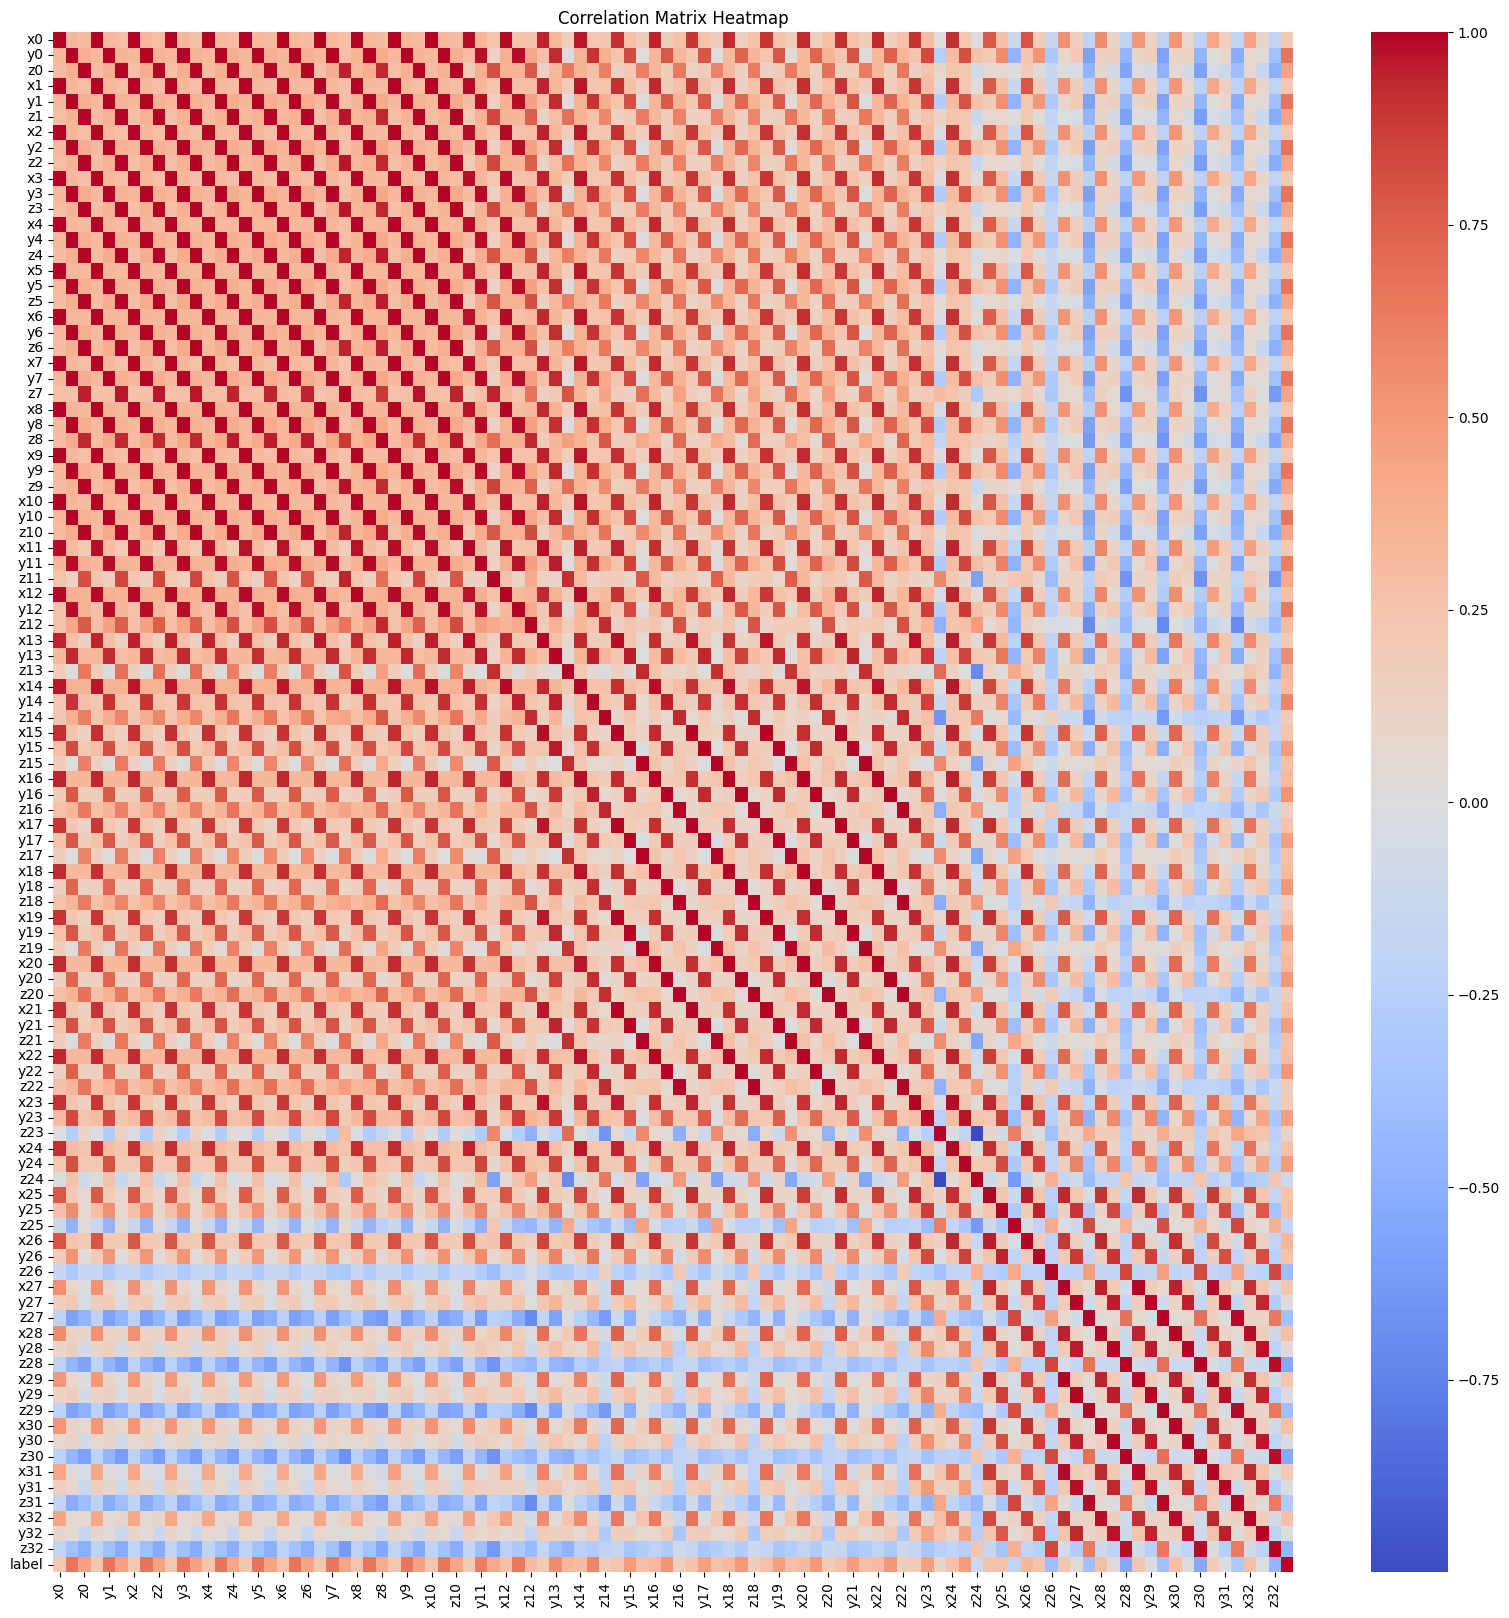

In [303]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## Data Cleaning & Preprocessing

In [304]:
df.loc[df.isna().any(axis=1)]

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x30,y30,z30,x31,y31,z31,x32,y32,z32,label
1105,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1110,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1126,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1347,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5340,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5341,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5343,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Handling missing data

In [305]:
def handle_missing(df: pd.DataFrame, train: bool = False, fill_value: float = 0) -> pd.DataFrame:
    ret = df.copy()
    if train:
        ret = ret.dropna()
    else:
        ret[df.isna().any(axis=1)] = fill_value
    return ret

In [306]:
def set_data_type(df: pd.DataFrame) -> pd.DataFrame:
    return df.astype(float)

### Removing Duplicates

In [307]:
def remove_duplicates(df: pd.DataFrame) -> pd.DataFrame:
    ret = df.copy()
    return ret.drop_duplicates()

### Handling Outliers

In [308]:
def apply_winsorization(df: pd.DataFrame, limits: tuple = (0.005, 0.005)):
    df_winsorized = df.copy()

    for column in df_winsorized.select_dtypes(include=['float64', 'int64']).columns:
        df_winsorized[column] = winsorize(df_winsorized[column], limits=limits)

    return df_winsorized

### PCA

In [309]:
def apply_pca(df: pd.DataFrame) -> pd.DataFrame:
    return df

### Feature Scaling

In [310]:
standard_scaler = StandardScaler()

def scale(df: pd.DataFrame, train:bool = False) -> pd.DataFrame:
  cols = [col for col in df.columns if col != "label"]
  ret = df.copy()
  if train:
    ret[cols] = standard_scaler.fit_transform(df[cols])
  else:
    ret[cols] = standard_scaler.transform(df[cols])
  return ret

### Data Pipeline

In [336]:
def pipeline(df: pd.DataFrame, train: bool = False) -> pd.DataFrame:
    df = handle_missing(df, train)
    df = set_data_type(df)
    if train: df = remove_duplicates(df)
    df = apply_winsorization(df)
    df = apply_pca(df)
    df = scale(df, train)
    return df

## Modelling

In [337]:
processed_df = pipeline(df, True)

In [338]:
train_set, val_set = train_test_split(
    processed_df, test_size = 0.2,
    random_state = 43,
    stratify = processed_df['label'])

In [339]:
X_train = train_set.drop(columns = ['label'])
y_train = train_set["label"]

X_val = val_set.drop(columns = ['label'])
y_val = val_set["label"]

In [340]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_val)

print(accuracy_score(y_val, y_pred))

0.984468339307049


## Submission

In [341]:
test = pd.read_csv('test.csv')
test_id = test["0"]
test_df = test.drop(columns = ["0", "100"])
test_df.columns = assign_columns(test_df, False)

test_df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z29,x30,y30,z30,x31,y31,z31,x32,y32,z32
0,0.5075194835662842,0.330058,-0.375520,0.512344,0.319056,-0.364889,0.515826,0.320594,-0.364906,0.519358,...,0.282711,0.496469,0.772567,0.280255,0.525925,0.827410,0.197173,0.498496,0.814822,0.191333
1,0.5076072216033936,0.320170,-0.282867,0.511824,0.305858,-0.276470,0.515073,0.306822,-0.276461,0.518427,...,0.343641,0.499526,0.785930,0.330693,0.526761,0.825452,0.274688,0.496206,0.827215,0.256538
2,0.2681868076324463,0.871031,0.112106,0.262448,0.876088,0.129068,0.263026,0.875450,0.129028,0.263600,...,0.128874,0.551927,0.949231,-0.089467,0.570419,0.860906,0.083947,0.571814,0.912071,-0.160683
3,0.4550536274909973,0.317806,-0.153503,0.456832,0.313055,-0.146688,0.458362,0.314132,-0.146717,0.460134,...,0.164227,0.436197,0.725750,0.118241,0.482484,0.734525,0.102248,0.434408,0.743579,0.044930
4,0.5117846131324768,0.618716,-0.361789,0.515621,0.605499,-0.357116,0.518996,0.606824,-0.357133,0.521917,...,0.121517,0.500948,0.749527,0.077350,0.533474,0.778241,0.097360,0.497336,0.770007,0.053095


In [342]:
processed_test = pipeline(test_df, False)

In [343]:
submission = xgb_clf.predict(processed_test)

In [357]:
submission_df = pd.concat([test_id, pd.Series(submission).astype(int)], axis=1)
submission_df.columns = ["id", "label"]

In [366]:
sample = pd.read_csv('sample_submission.csv')
sample.drop(columns = ["label"], inplace = True)

In [375]:
submit_csv = sample.merge(submission_df[['id', 'label']], on='id', how='left')

In [376]:
submit_csv.to_csv('submission.csv', index=False)